<a href="https://colab.research.google.com/github/rounak-data/rounak-data/blob/main/Copy_of_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means Clustering
This project segments customers using K-Means clustering on the Mall_Customers dataset to help businesses understand different types of customer behaviour.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mall_customers.csv to mall_customers (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Plotting setup
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
# Load dataset
df = pd.read_csv("mall_customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Female,21,16,81
2,3,Male,20,17,6
3,4,Female,23,18,77
4,5,Male,31,19,40


In [ ]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              20 non-null     int64 
 1   Gender                  20 non-null     object
 2   Age                     20 non-null     int64 
 3   Annual Income (k$)      20 non-null     int64 
 4   Spending Score (1-100)  20 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 932.0+ bytes


In [ ]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


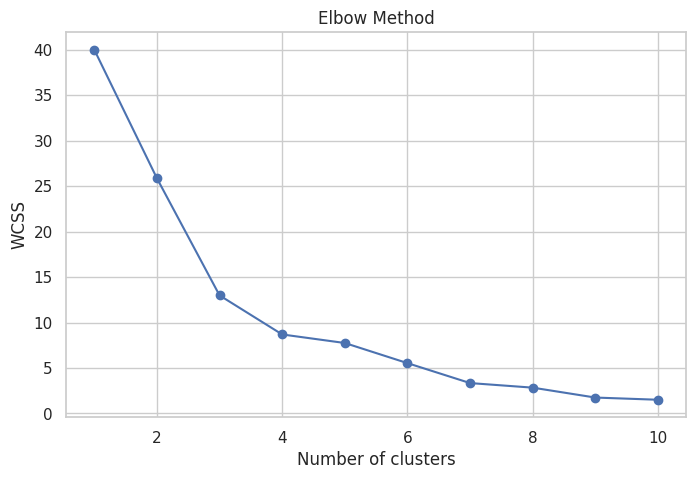

In [ ]:
# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# From the elbow plot, let's choose 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


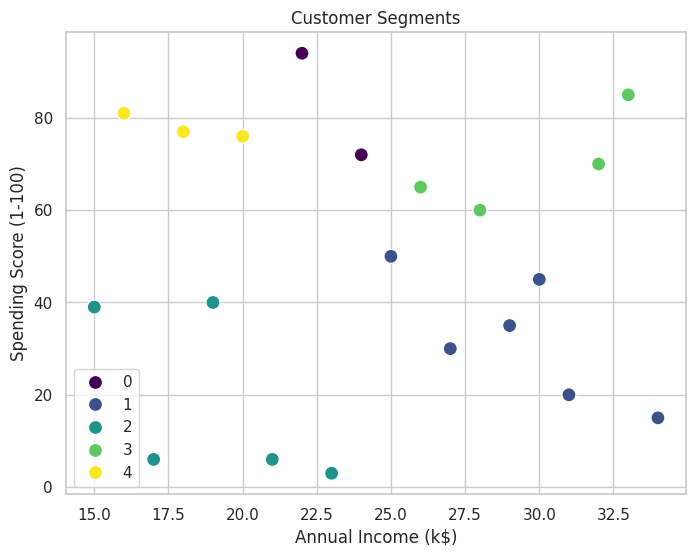

In [ ]:
# Visualise clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
